#MILESTONE 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("data.csv", sep=';')
df.head()


/tmp/ipython-input-676656787.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97195 entries, 0 to 97194
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   97195 non-null  object 
 1   Time                   97195 non-null  object 
 2   Global_active_power    97194 non-null  object 
 3   Global_reactive_power  97194 non-null  object 
 4   Voltage                97194 non-null  object 
 5   Global_intensity       97194 non-null  object 
 6   Sub_metering_1         97194 non-null  object 
 7   Sub_metering_2         97194 non-null  object 
 8   Sub_metering_3         97188 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.7+ MB


In [6]:
df['timestamp'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    dayfirst=True,
    errors='coerce'
)


In [7]:
df['timestamp'].isnull().sum()

np.int64(1)

In [8]:
df = df.dropna(subset=['timestamp'])

In [9]:
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.set_index('timestamp', inplace=True)


In [10]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(method='ffill')

/tmp/ipython-input-464854712.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97194 entries, 2006-12-16 17:24:00 to 2007-02-22 05:17:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    97194 non-null  float64
 1   Global_reactive_power  97194 non-null  float64
 2   Voltage                97194 non-null  float64
 3   Global_intensity       97194 non-null  float64
 4   Sub_metering_1         97194 non-null  float64
 5   Sub_metering_2         97194 non-null  float64
 6   Sub_metering_3         97194 non-null  float64
dtypes: float64(7)
memory usage: 5.9 MB


In [12]:
hourly_df = df.resample('H').mean()
hourly_df.head()

/tmp/ipython-input-567724756.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df.resample('H').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [13]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1621 entries, 2006-12-16 17:00:00 to 2007-02-22 05:00:00
Freq: h
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1621 non-null   float64
 1   Global_reactive_power  1621 non-null   float64
 2   Voltage                1621 non-null   float64
 3   Global_intensity       1621 non-null   float64
 4   Sub_metering_1         1621 non-null   float64
 5   Sub_metering_2         1621 non-null   float64
 6   Sub_metering_3         1621 non-null   float64
dtypes: float64(7)
memory usage: 101.3 KB


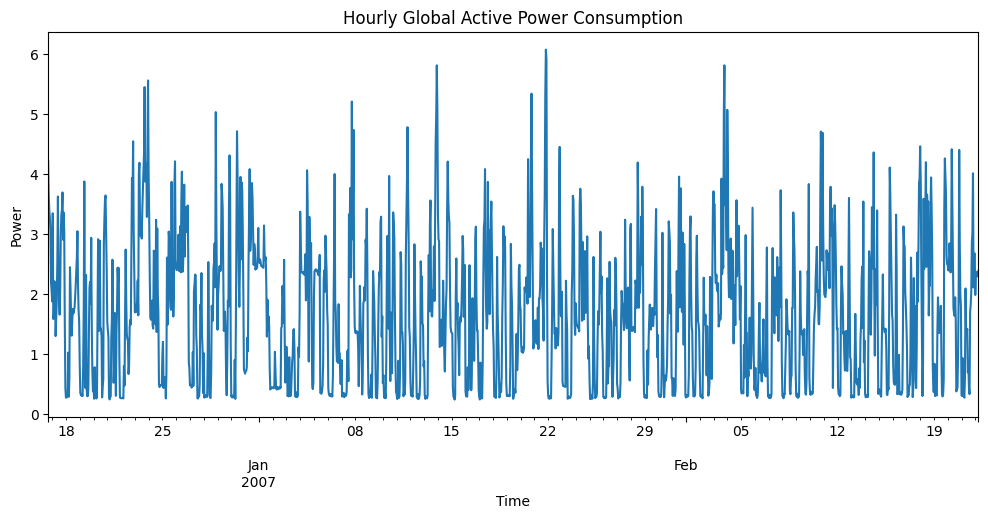

In [14]:
hourly_df['Global_active_power'].plot(figsize=(12,5))
plt.title("Hourly Global Active Power Consumption")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_hourly = scaler.fit_transform(hourly_df)

scaled_hourly_df = pd.DataFrame(
    scaled_hourly,
    index=hourly_df.index,
    columns=hourly_df.columns
)

In [16]:
train_size = int(len(scaled_hourly_df) * 0.8)

train = scaled_hourly_df.iloc[:train_size]
test = scaled_hourly_df.iloc[train_size:]


In [17]:
train.to_csv("train_hourly.csv")
test.to_csv("test_hourly.csv")


In [18]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,97194.000000,97194.000000,97194.000000,97194.000000,97194.000000,97194.000000,97194.000000
mean,1.651845,0.129247,240.849075,6.983799,1.340247,1.917711,7.490010
std,1.340816,0.117658,3.471446,5.652233,6.751879,7.628510,8.664797
min,0.194000,0.000000,224.680000,0.800000,0.000000,0.000000,0.000000
25%,0.398000,0.000000,238.530000,1.800000,0.000000,0.000000,0.000000
50%,1.422000,0.116000,241.090000,5.800000,0.000000,0.000000,0.000000
75%,2.422000,0.198000,243.330000,10.000000,0.000000,1.000000,17.000000
max,9.272000,0.874000,251.700000,40.400000,77.000000,78.000000,20.000000


In [19]:
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])
print("Start time:", df.index.min())
print("End time:", df.index.max())


Total rows: 97194
Total columns: 7
Start time: 2006-12-16 17:24:00
End time: 2007-02-22 05:17:00


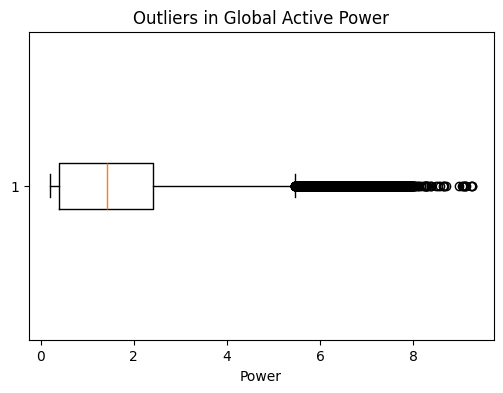

In [20]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Global_active_power'], vert=False)
plt.title("Outliers in Global Active Power")
plt.xlabel("Power")
plt.show()


In [21]:
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df['Global_active_power'] < lower_bound) |
    (df['Global_active_power'] > upper_bound)
]

print("Number of outliers:", outliers.shape[0])

Number of outliers: 1504


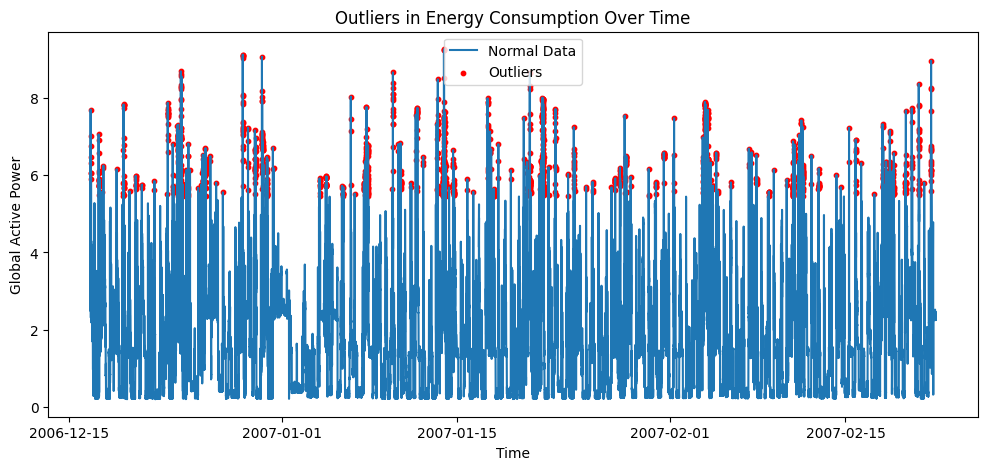

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Global_active_power'], label='Normal Data')
plt.scatter(outliers.index, outliers['Global_active_power'],
            color='red', s=10, label='Outliers')
plt.legend()
plt.title("Outliers in Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Global Active Power")
plt.show()

In [23]:
print("DATA SUMMARY")
print("-------------")
print("Total samples:", df.shape[0])
print("Features:", list(df.columns))
print("Outliers detected (Global_active_power):", outliers.shape[0])


DATA SUMMARY
-------------
Total samples: 97194
Features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
Outliers detected (Global_active_power): 1504


#MILESTONE 2

In [24]:
df = pd.read_csv("train_hourly.csv", index_col=0, parse_dates=True)
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,
2006-12-16 17:00:00,0.682185,0.375233,0.264248,0.675010,0.0,0.013178,0.897663
2006-12-16 18:00:00,0.580911,0.106453,0.261262,0.576209,0.0,0.167707,0.897959
2006-12-16 19:00:00,0.541140,0.115836,0.198100,0.532868,0.0,0.035789,0.888199
2006-12-16 20:00:00,0.518565,0.097552,0.237422,0.509683,0.0,0.000000,0.893523
2006-12-16 21:00:00,0.482201,0.100379,0.382109,0.475300,0.0,0.010404,0.916593


In [25]:
feature_df = df.copy()

feature_df['hour'] = feature_df.index.hour
feature_df['day'] = feature_df.index.day
feature_df['dayofweek'] = feature_df.index.dayofweek
feature_df['month'] = feature_df.index.month


In [26]:
feature_df['lag_1'] = feature_df['Global_active_power'].shift(1)
feature_df['lag_24'] = feature_df['Global_active_power'].shift(24)


In [27]:
feature_df['rolling_mean_3'] = feature_df['Global_active_power'].rolling(3).mean()
feature_df['rolling_mean_24'] = feature_df['Global_active_power'].rolling(24).mean()


In [28]:
feature_df = feature_df.dropna()
feature_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,dayofweek,month,lag_1,lag_24,rolling_mean_3,rolling_mean_24
timestamp,,,,,,,,,,,,,,,
2006-12-17 17:00:00,0.542260,0.262705,0.244843,0.533131,0.0,0.011652,0.895297,17,17,6,12,0.528418,0.682185,0.513565,0.380817
2006-12-17 18:00:00,0.592038,0.205750,0.251521,0.582137,0.0,0.000000,0.896185,18,17,6,12,0.542260,0.580911,0.554239,0.381281
2006-12-17 19:00:00,0.456814,0.440488,0.196374,0.454354,0.0,0.012901,0.888199,19,17,6,12,0.592038,0.541140,0.530371,0.377767
2006-12-17 20:00:00,0.534499,0.451916,0.347795,0.523910,0.0,0.027882,0.911269,20,17,6,12,0.456814,0.518565,0.527784,0.378431
2006-12-17 21:00:00,0.479509,0.445540,0.473290,0.462258,0.0,0.029963,0.931677,21,17,6,12,0.534499,0.482201,0.490274,0.378319


In [29]:
from sklearn.model_selection import train_test_split

X = feature_df.drop('Global_active_power', axis=1)
y = feature_df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

(0.0024579694415151794, np.float64(0.0034314518273766957))

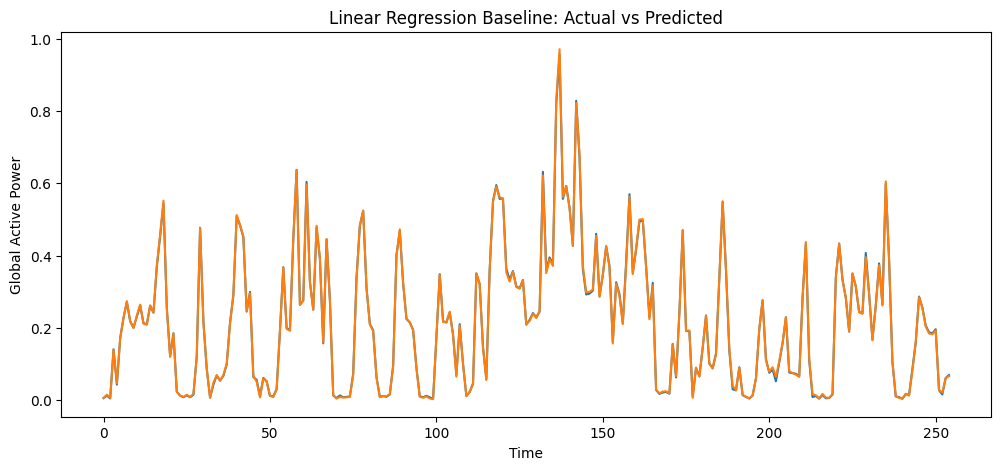

In [32]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values)
plt.plot(y_pred)
plt.title("Linear Regression Baseline: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Global Active Power")
plt.show()

In [33]:
feature_df.to_csv("feature_engineered_data.csv")


#MILESTONE 3

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
train = pd.read_csv("train_hourly.csv", index_col=0)
test = pd.read_csv("test_hourly.csv", index_col=0)

train.index = pd.to_datetime(train.index, dayfirst=True, errors='coerce')
test.index = pd.to_datetime(test.index, dayfirst=True, errors='coerce')

target_column = "Global_active_power"

/tmp/ipython-input-2420277471.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  train.index = pd.to_datetime(train.index, dayfirst=True, errors='coerce')


In [36]:
def create_sequences(data, target_col, seq_length=24):
    X, y = [], []
    values = data[target_col].values
    for i in range(seq_length, len(values)):
        X.append(values[i-seq_length:i])
        y.append(values[i])
    return np.array(X), np.array(y)

SEQ_LEN = 24  # past 24 hours

X_train, y_train = create_sequences(train, target_column, SEQ_LEN)
X_test, y_test = create_sequences(test, target_column, SEQ_LEN)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [37]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, 1)),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0413 - val_loss: 0.0309
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0343 - val_loss: 0.0286
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0331 - val_loss: 0.0278
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0314 - val_loss: 0.0267
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0282 - val_loss: 0.0240
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0249 - val_loss: 0.0217
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0208 - val_loss: 0.0216
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0204 - val_loss: 0.0211
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0182 - val_loss: 0.0207
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0179 - val_loss: 0.0202
Epoch 11/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0184 - val_loss: 0.0197
Epoch 12/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0

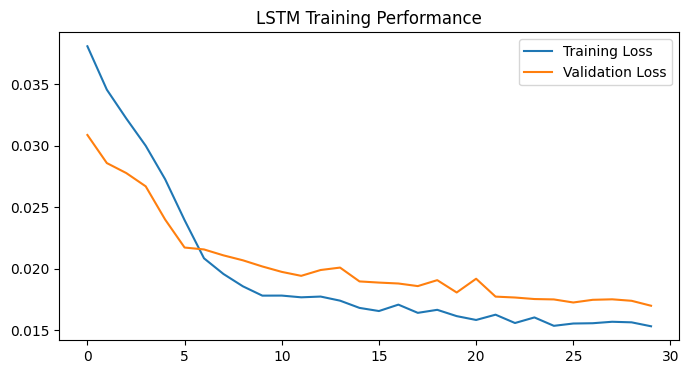

In [39]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("LSTM Training Performance")
plt.show()

In [40]:
lstm_predictions = model.predict(X_test).flatten()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [41]:
mae = mean_absolute_error(y_test, lstm_predictions)
rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
r2 = r2_score(y_test, lstm_predictions)

print("LSTM Model Performance")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

LSTM Model Performance
MAE : 0.0944658006315589
RMSE: 0.13313006933741842
R²  : 0.5561898097686686


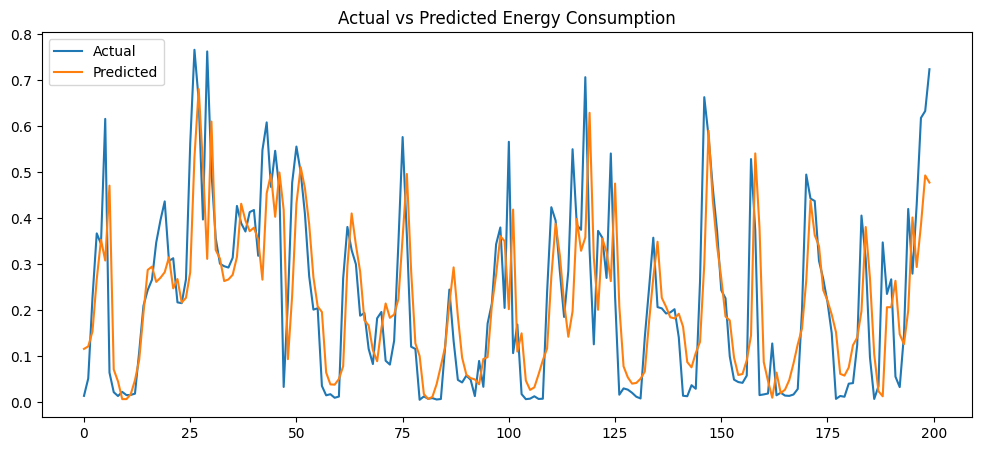

In [42]:
plt.figure(figsize=(12,5))
plt.plot(y_test[:200], label="Actual")
plt.plot(lstm_predictions[:200], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Energy Consumption")
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train_lr = np.arange(len(train)).reshape(-1, 1)
y_train_lr = train[target_column].values

X_test_lr = np.arange(len(test)).reshape(-1, 1)
y_test_lr = test[target_column].values

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

baseline_predictions = lr_model.predict(X_test_lr)

baseline_mae = mean_absolute_error(y_test_lr, baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(y_test_lr, baseline_predictions))

print("Baseline Linear Regression")
print("MAE :", baseline_mae)
print("RMSE:", baseline_rmse)

Baseline Linear Regression
MAE : 0.16873050919283594
RMSE: 0.19911360946782927


In [44]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "LSTM"],
    "RMSE": [baseline_rmse, rmse],
    "MAE": [baseline_mae, mae]
})

comparison

,Model,RMSE,MAE
0,Linear Regression,0.199114,0.168731
1,LSTM,0.133130,0.094466


In [45]:
model.save("energy_lstm_model.h5")
print("LSTM model saved successfully")

LSTM model saved successfully


In [46]:
from tensorflow.keras.models import load_model

loaded_model = load_model("energy_lstm_model.h5", compile=False)

#MILESTONE 4

In [47]:
import pandas as pd

df = pd.read_csv("test_hourly.csv", index_col=0, parse_dates=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,
2007-02-08 17:00:00,0.261440,0.060083,0.577343,0.246081,0.000000,0.000000,0.927240
2007-02-08 18:00:00,0.262006,0.156011,0.405402,0.254248,0.000000,0.015814,0.445430
2007-02-08 19:00:00,0.534676,0.371805,0.377008,0.526545,0.435426,0.000000,0.000000
2007-02-08 20:00:00,0.468850,0.078306,0.410136,0.453827,0.009196,0.002081,0.797693
2007-02-08 21:00:00,0.426250,0.141457,0.474180,0.413911,0.211116,0.014565,0.228926


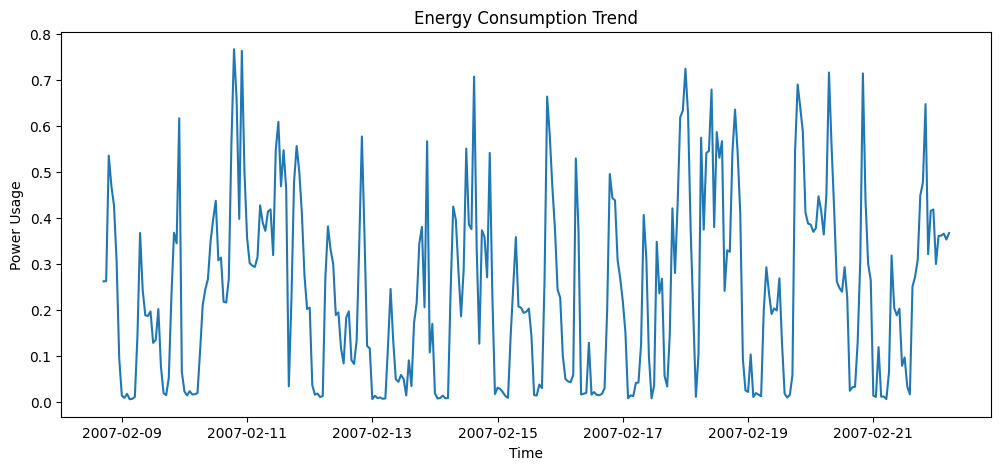

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Global_active_power'])
plt.title("Energy Consumption Trend")
plt.xlabel("Time")
plt.ylabel("Power Usage")
plt.show()

In [51]:
print(df.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


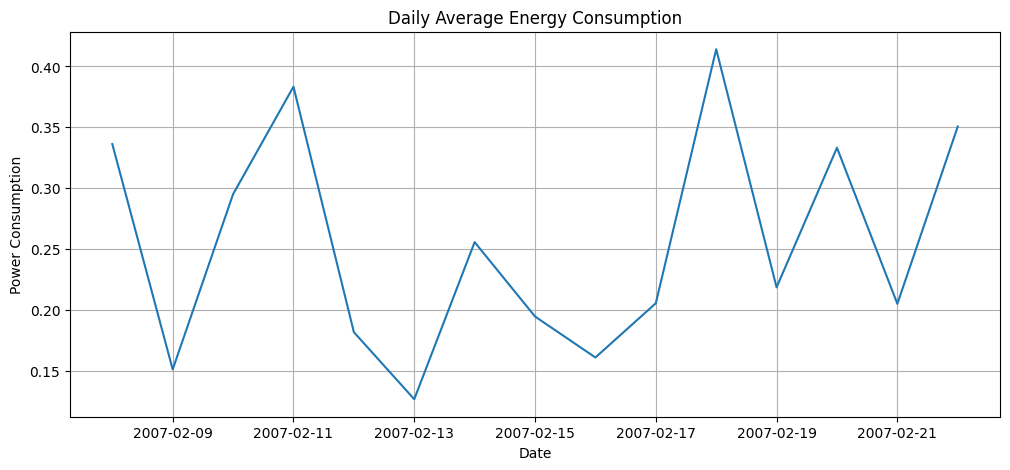

In [52]:
df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')

df = df.dropna()

daily_avg = df.resample('D').mean()

plt.figure(figsize=(12,5))
plt.plot(daily_avg.index, daily_avg['Global_active_power'])
plt.title("Daily Average Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.grid(True)
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


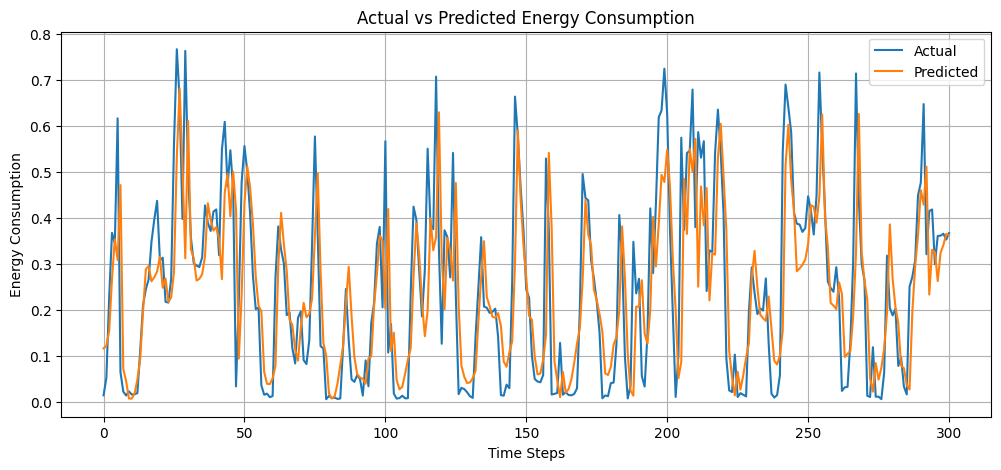

In [53]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

df = pd.read_csv("test_hourly.csv", index_col=0)

df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')
df = df.dropna()

actual_values = df['Global_active_power'].values

model = load_model("energy_lstm_model.h5", compile=False)

window = 24
X = []
for i in range(window, len(actual_values)):
    X.append(actual_values[i-window:i])

X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1)

predicted_values = model.predict(X)

actual_values = actual_values[window:]

plt.figure(figsize=(12,5))
plt.plot(actual_values, label="Actual")
plt.plot(predicted_values, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Time Steps")
plt.ylabel("Energy Consumption")
plt.grid(True)
plt.show()


In [54]:
def energy_tip(value):
    if value > 0.7:
        return "High consumption → Reduce AC/heater usage."
    elif value > 0.4:
        return "Moderate consumption → Monitor devices."
    else:
        return "Efficient energy usage."

df['suggestion'] = df['Global_active_power'].apply(energy_tip)
df[['Global_active_power','suggestion']].head()


,Global_active_power,suggestion
timestamp,,
2007-08-02 17:00:00,0.261440,Efficient energy usage.
2007-08-02 18:00:00,0.262006,Efficient energy usage.
2007-08-02 19:00:00,0.534676,Moderate consumption → Monitor devices.
2007-08-02 20:00:00,0.468850,Moderate consumption → Monitor devices.
2007-08-02 21:00:00,0.426250,Moderate consumption → Monitor devices.
